In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\Project\E_Commerce\Superstore_CD.csv", encoding='latin1')

In [3]:
sales_df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Discounted_Sale,Cost,Profit,Quantity,Discount,Actual_Sale
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,220.05,41.9136,2,0%,261.96
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,512.36,219.5820,3,0%,731.94
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,7.75,6.8714,2,0%,14.62
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,1340.61,-383.0310,5,45%,1741.05
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,19.85,2.5164,2,20%,27.96


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         9994 non-null   object 
 1   Order_Date       9994 non-null   object 
 2   Ship_Date        9994 non-null   object 
 3   Ship_Mode        9994 non-null   object 
 4   Customer_ID      9994 non-null   object 
 5   Customer_Name    9994 non-null   object 
 6   Segment          9994 non-null   object 
 7   Country          9994 non-null   object 
 8   City             9994 non-null   object 
 9   State            9994 non-null   object 
 10  Region           9994 non-null   object 
 11  Product_ID       9994 non-null   object 
 12  Category         9994 non-null   object 
 13  Sub_Category     9994 non-null   object 
 14  Product_Name     9994 non-null   object 
 15  Discounted_Sale  9994 non-null   float64
 16  Cost             9994 non-null   float64
 17  Profit        

In [5]:
sales_df["Order_Date"] = pd.to_datetime(sales_df["Order_Date"])
sales_df["Ship_Date"] = pd.to_datetime(sales_df["Ship_Date"])

In [6]:
sales_df.nunique()

Order_ID           5009
Order_Date         1237
Ship_Date          1334
Ship_Mode             4
Customer_ID         793
Customer_Name       793
Segment               3
Country               1
City                531
State                49
Region                4
Product_ID         1862
Category              3
Sub_Category         17
Product_Name       1850
Discounted_Sale    5825
Cost               5055
Profit             7287
Quantity             14
Discount             12
Actual_Sale        4290
dtype: int64

In [7]:
sales_df.isna().sum()

Order_ID           0
Order_Date         0
Ship_Date          0
Ship_Mode          0
Customer_ID        0
Customer_Name      0
Segment            0
Country            0
City               0
State              0
Region             0
Product_ID         0
Category           0
Sub_Category       0
Product_Name       0
Discounted_Sale    0
Cost               0
Profit             0
Quantity           0
Discount           0
Actual_Sale        0
dtype: int64

In [8]:
sales_df.drop(columns = ["Country"], inplace = True)

In [9]:
sales_df.describe(include = "all")

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Discounted_Sale,Cost,Profit,Quantity,Discount,Actual_Sale
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000
unique,5009,NaN,NaN,4,793,793,3,531,49,4,1862,3,17,1850,NaN,NaN,NaN,NaN,12,NaN
top,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,0%,NaN
freq,14,NaN,NaN,5968,37,37,5191,915,2001,3203,19,6026,1523,48,NaN,NaN,NaN,NaN,4798,NaN
mean,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,201.201367,28.656896,3.789574,NaN,286.565443
min,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,0.550000,-6599.978000,1.000000,NaN,0.990000
25%,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,12.690000,1.728750,2.000000,NaN,21.360000
50%,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,41.660000,8.666500,3.000000,NaN,64.960000
75%,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,182.227500,29.364000,5.000000,NaN,251.910000
max,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22638.480000,24449.560000,8399.976000,14.000000,NaN,45276.960000


In [10]:
sales_df["Actual_Sale"].sum().round(2)

np.float64(2863935.04)

In [11]:
sales_df["Discounted_Sale"].sum().round(2)

np.float64(2297200.86)

In [12]:
sales_df["Profit"].sum()

np.float64(286397.0217)

In [13]:
product_avg_cost = sales_df.groupby("Product_Name")["Cost"].mean().sort_values(ascending = "").reset_index().round(2)
product_avg_cost

,Product_Name,Cost
0,Cisco TelePresence System EX90 Videoconferenci...,24449.56
1,Cubify CubeX 3D Printer Triple Head Print,11839.97
2,Canon imageCLASS 2200 Advanced Copier,7279.98
3,Cubify CubeX 3D Printer Double Head Print,6659.98
4,High Speed Automatic Electric Letter Opener,5764.11
...,...,...
1845,Stockwell Gold Paper Clips,2.35
1846,Hoover Replacement Belt for Commercial Guardsm...,2.33
1847,Maxell 4.7GB DVD-R 5/Pack,2.33
1848,"OIC Binder Clips, Mini, 1/4"" Capacity, Black",1.71


In [14]:
profit_loss_on_each_product = sales_df.groupby("Product_Name")["Profit"].sum().sort_values(ascending = "").reset_index().round(2)
profit_loss_on_each_product

,Product_Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.93
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04
2,Hewlett Packard LaserJet 3310 Copier,6983.88
3,Canon PC1060 Personal Laser Copier,4570.93
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.98
...,...,...
1845,Bush Advantage Collection Racetrack Conference...,-1934.40
1846,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.12
1847,Cubify CubeX 3D Printer Triple Head Print,-3839.99
1848,Lexmark MX611dhe Monochrome Laser Printer,-4589.97


In [15]:
price_difference = sales_df["Actual_Sale"] - sales_df["Discounted_Sale"]
price_difference.sum().round(2)

np.float64(566734.18)

In [16]:
sales_df['Ship_Days'] = (sales_df['Ship_Date'] - sales_df['Order_Date']).dt.days
sales_df['Ship_Days'].mean().round()

np.float64(4.0)

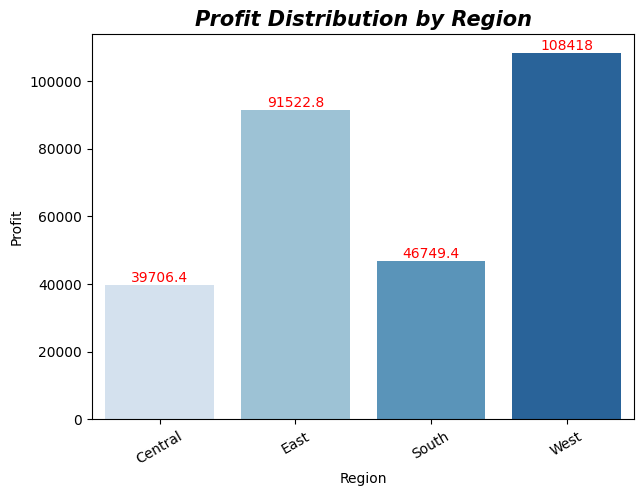

In [17]:
region_profit = sales_df.groupby("Region")["Profit"].sum().reset_index()
plt.figure(figsize=(7,5))
colors = sns.color_palette("Blues", n_colors=len(region_profit))
ax = sns.barplot(data = region_profit,
                 x = "Region",
                 y = "Profit",
                 hue = "Region",
                 palette = colors,
                 legend=False)

ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, color = "r")
plt.title("Profit Distribution by Region", fontsize = 15, fontweight = "bold", fontstyle = "oblique")

plt.xticks(rotation = 30)
plt.show()

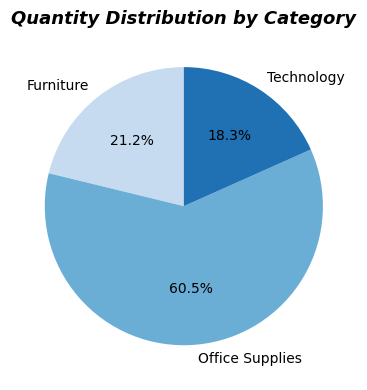

In [18]:
category_count = sales_df.groupby("Category")["Quantity"].sum()

colors = sns.color_palette("Blues", n_colors=len(category_count))
plt.figure(figsize=(4, 4))
ex = [0.0,0.0,0.0]
plt.pie(category_count,
        labels=category_count.index,
        explode = ex, autopct="%1.1f%%",
        startangle=90,
        colors=colors)
plt.title("Quantity Distribution by Category", fontsize = 13, fontweight = "bold", fontstyle = "oblique")

plt.tight_layout()
plt.show()

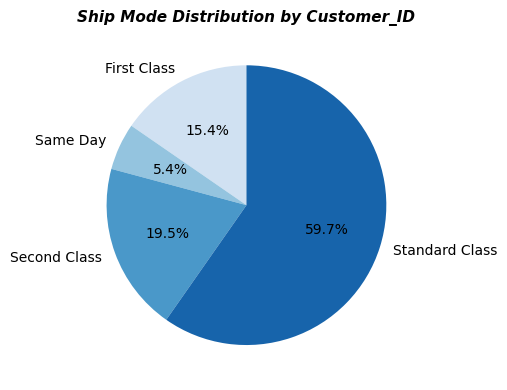

In [19]:
segment_count = sales_df.groupby("Ship_Mode")["Customer_ID"].count()

colors = sns.color_palette("Blues", n_colors=len(segment_count))
plt.figure(figsize=(6, 4))
ex = [0.0,0.0,0.0,0.0]
plt.pie(segment_count,
        labels=segment_count.index,
        explode = ex, autopct="%1.1f%%",
        startangle=90,
        colors=colors)
plt.title("Ship Mode Distribution by Customer_ID", fontsize = 11, fontweight = "bold", fontstyle = "oblique")

plt.tight_layout()
plt.show()

In [20]:
sales_df['Month'] = sales_df['Order_Date'].dt.month_name()

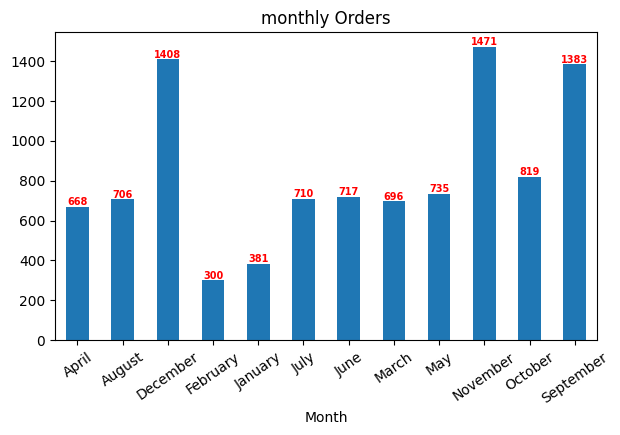

In [21]:
Monthly_orders = sales_df.groupby("Month")["Order_ID"].count()
plt.figure(figsize =(7,4))
Monthly_orders.plot(kind = "bar")
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, size = 7, color = "r", fontweight = "bold")
plt.xticks(rotation = 35)
plt.title("monthly Orders")
plt.show()

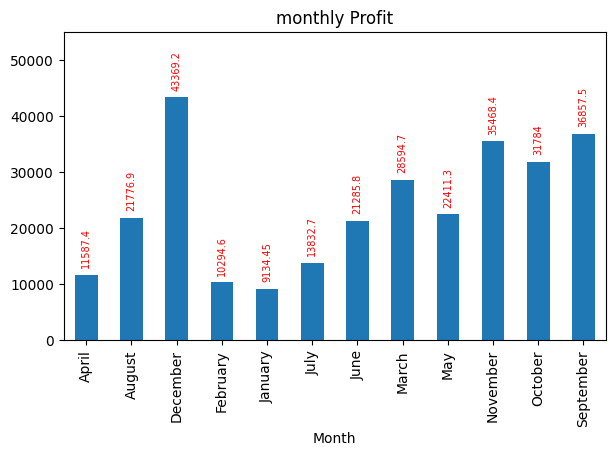

In [22]:
Monthly_Profit = sales_df.groupby("Month")["Profit"].sum()
plt.figure(figsize =(7,4))
Monthly_Profit.plot(kind = "bar")
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, size = 7, rotation = 90, padding = 5, color = "r")

plt.title("monthly Profit")
plt.ylim(0, 55000)
plt.show()

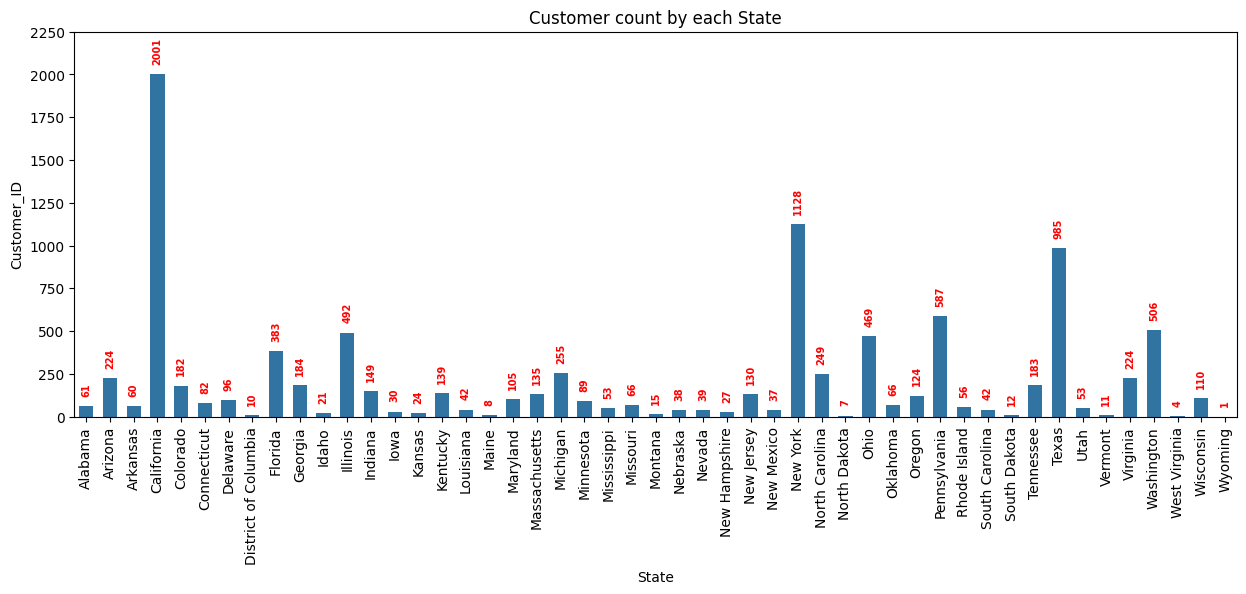

In [23]:
customer_count = sales_df.groupby("State")["Customer_ID"].count().reset_index()
plt.figure(figsize = (15,5))
sns.barplot(data = customer_count, x = "State", y = "Customer_ID", width = .6)
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, fontsize = 7, rotation = 90, padding= 7, color = "r", fontweight = "bold")

plt.ylim(0,2250)
plt.xticks(rotation = 90)

plt.title("Customer count by each State")
plt.show()

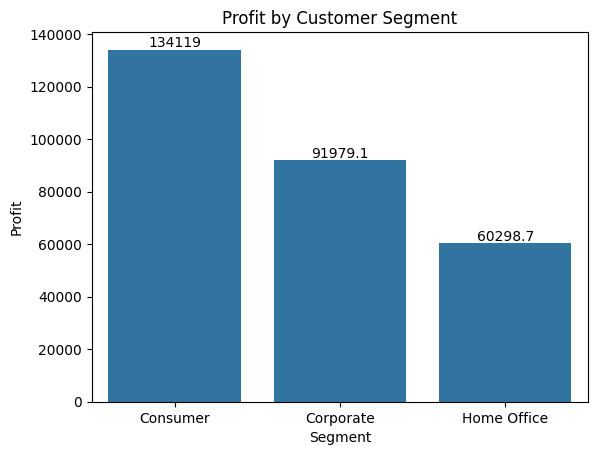

In [24]:
segment_profit = sales_df.groupby("Segment")["Profit"].sum().reset_index()
sns.barplot(data=segment_profit, x="Segment", y="Profit")
plt.title("Profit by Customer Segment")
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i)
plt.show()

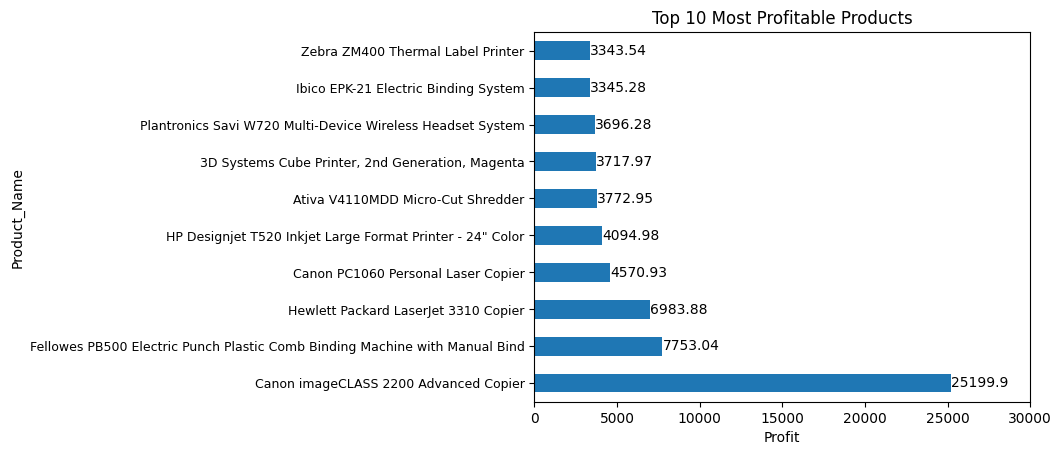

In [25]:
top_products = sales_df.groupby("Product_Name")["Profit"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit")
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i)
plt.xlim(0, 30000)
plt.yticks(fontsize = 9)
plt.show()


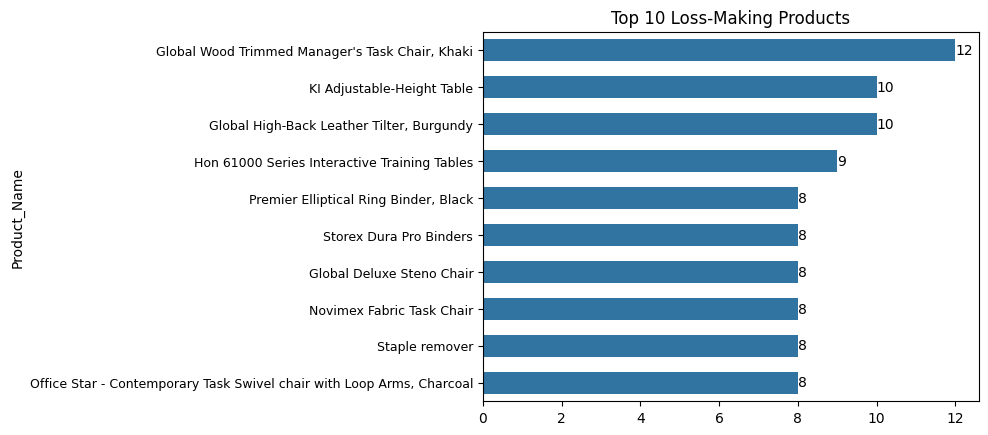

In [26]:
loss_products = sales_df[sales_df["Profit"] < 0]["Product_Name"].value_counts().head(10)
sns.barplot(x=loss_products.values, y=loss_products.index, width = .6)
plt.title("Top 10 Loss-Making Products")
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i)
    plt.yticks(fontsize = 9)
plt.show()


In [27]:
sales_df.keys()

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Region', 'Product_ID',
       'Category', 'Sub_Category', 'Product_Name', 'Discounted_Sale', 'Cost',
       'Profit', 'Quantity', 'Discount', 'Actual_Sale', 'Ship_Days', 'Month'],
      dtype='object')